In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [6]:
# Normal feedback values
fnames = [r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Shaking0_{}.h5'.format(i) for i in m_tmp]
# datasets_num = 10
# data_bdfs = load_dir(foldername, file_prefix='Shaking3', start_file=5000, max_file=datasets_num)

NameError: name 'm_tmp' is not defined

<IPython.core.display.Javascript object>


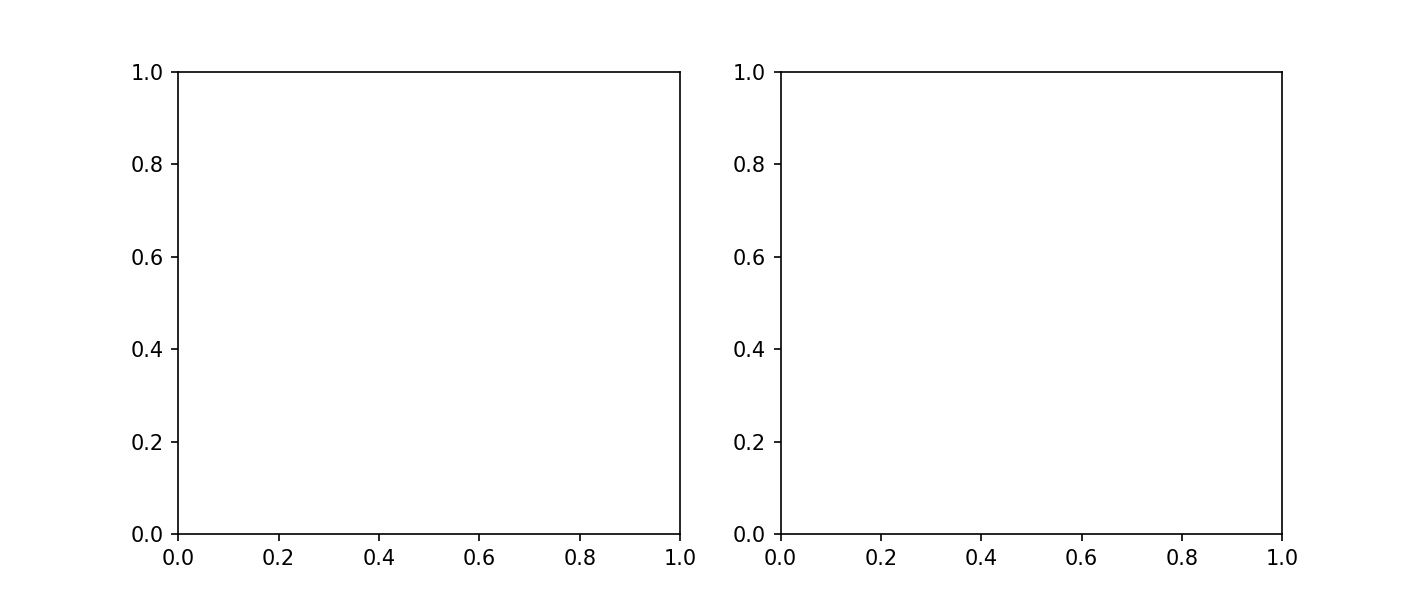

NameError: name 'data_bdfs' is not defined

In [7]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for i,bb in enumerate(data_bdfs[::100]):
    ax[0].semilogy(*bb.psd2('z'))
ax[0].set(xlim=(1,50),xlabel='frequency [Hz.]')

for i,bb in enumerate(data_bdfs[::100]):
    ax[1].semilogy(*bb.psd2('x'))
ax[1].set(xlim=(1,50),xlabel='frequency [Hz.]')

In [8]:
m_18_z = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_18.npy')
m_20_z = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_20.npy')
m_18_x = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/X_data_18.npy')

m_18_z2 = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_18_2.npy')
m_18_x2 = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/X_data_18_2.npy')

m_18_z3 = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_18_3.npy')
m_18_x3 = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/X_data_18_3.npy')
                  
AF_data = np.loadtxt("/data/new_trap/20200226/Bead1/Shaking/Shaking385/height_from_gauss.txt")

In [9]:
m_12_z = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_12.npy')
m_10_z = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_10.npy')
m_12_x = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/X_data_12.npy')
m_6_z = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Z_data_6.npy')
m_6_x = np.load(r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/X_data_6.npy')

In [10]:
Ndata = len(m_18_z2)
Ndata = 17000

<IPython.core.display.Javascript object>


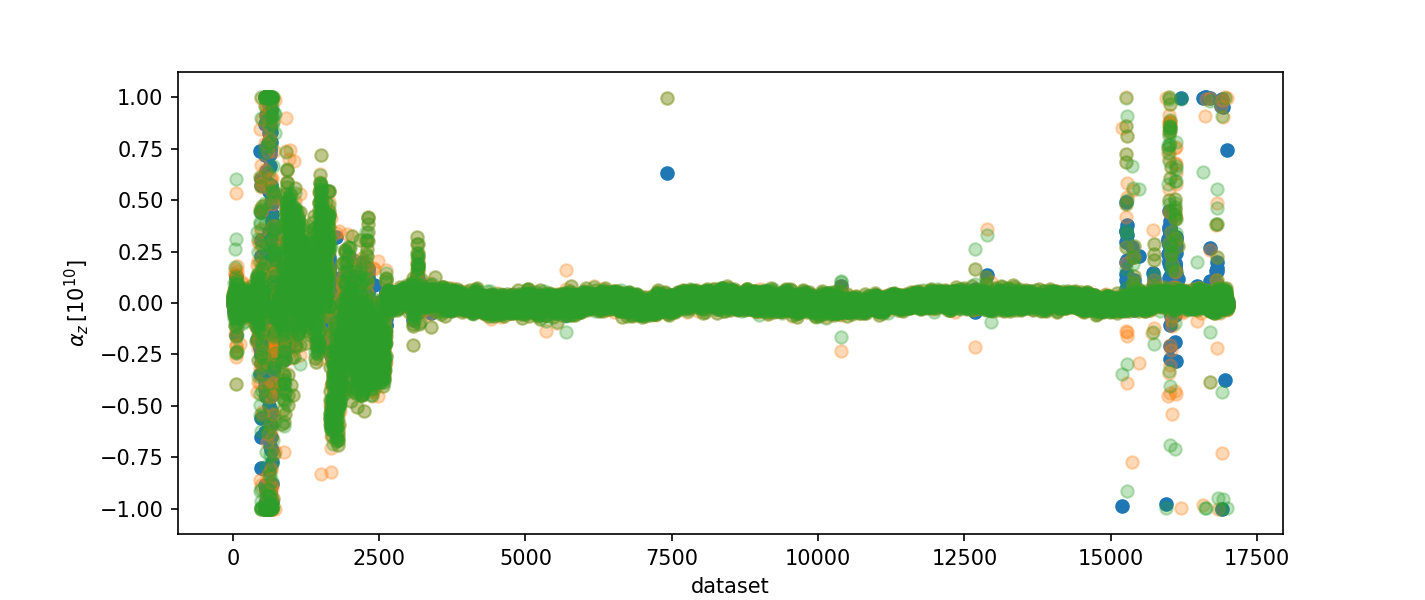

[Text(0, 0.5, '$\\alpha_z\\,[10^{10}]$'), Text(0.5, 0, 'dataset')]

In [11]:
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(Ndata), m_18_z[:Ndata,0])
ax.scatter(range(Ndata), m_18_z2[:Ndata,0], alpha=0.3)
ax.scatter(range(Ndata), m_18_z3[:Ndata,0], alpha=0.3)
# ax.scatter(range(Ndata), m_20_z[:,0])
ax.set(xlabel='dataset', ylabel=r'$\alpha_z\,[10^{10}]$')

<IPython.core.display.Javascript object>


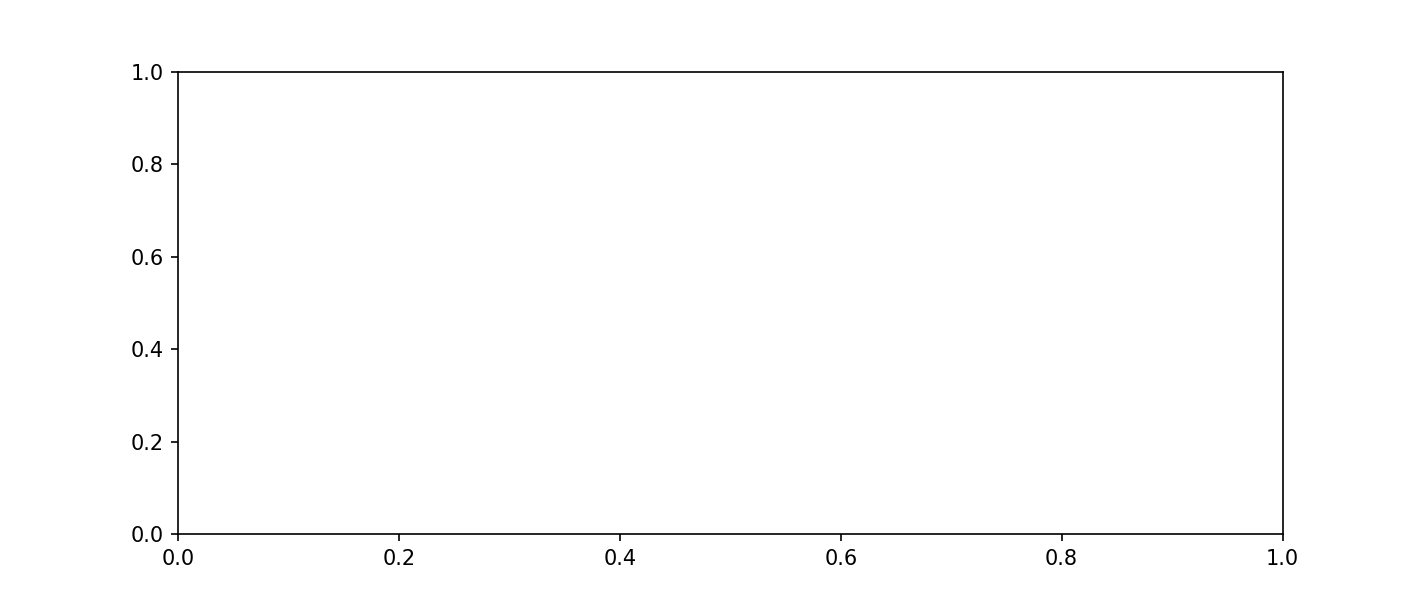

ValueError: x and y must be the same size

In [12]:
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(Ndata), m_18_z[:,1])
ax.scatter(range(Ndata), m_20_z[:,1])
ax.set(xlabel='dataset', ylabel=r'$\sigma_z$')
ax.set(ylim=(0,200))

<IPython.core.display.Javascript object>


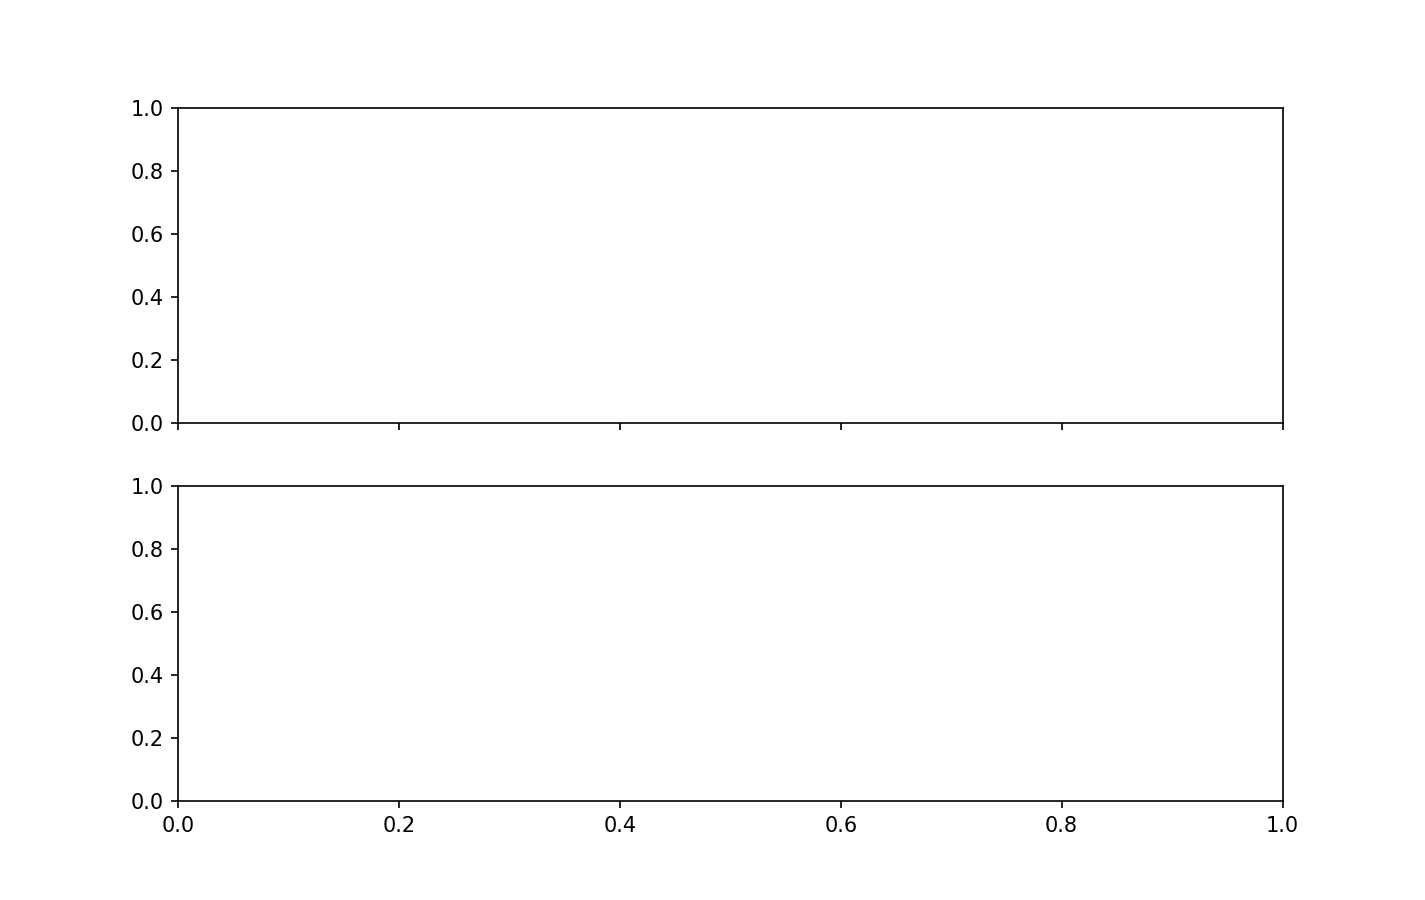

ValueError: x and y must be the same size

In [13]:
_, ax = plt.subplots(2,1,figsize=(9.5,6),sharex=True)
ax[0].scatter(range(Ndata), m_18_x[:,0])
ax[0].scatter(range(len(m_18_x_filt[:,0])), m_18_x_filt[:,0], alpha=0.5)
ax[0].set(ylabel=r'$\alpha_x\,[10^{10}]$')
ax[1].scatter(range(len(AF_data)), AF_data)
ax[1].set(xlabel='dataset', ylabel=r'Height $[\mu m]$')

<IPython.core.display.Javascript object>


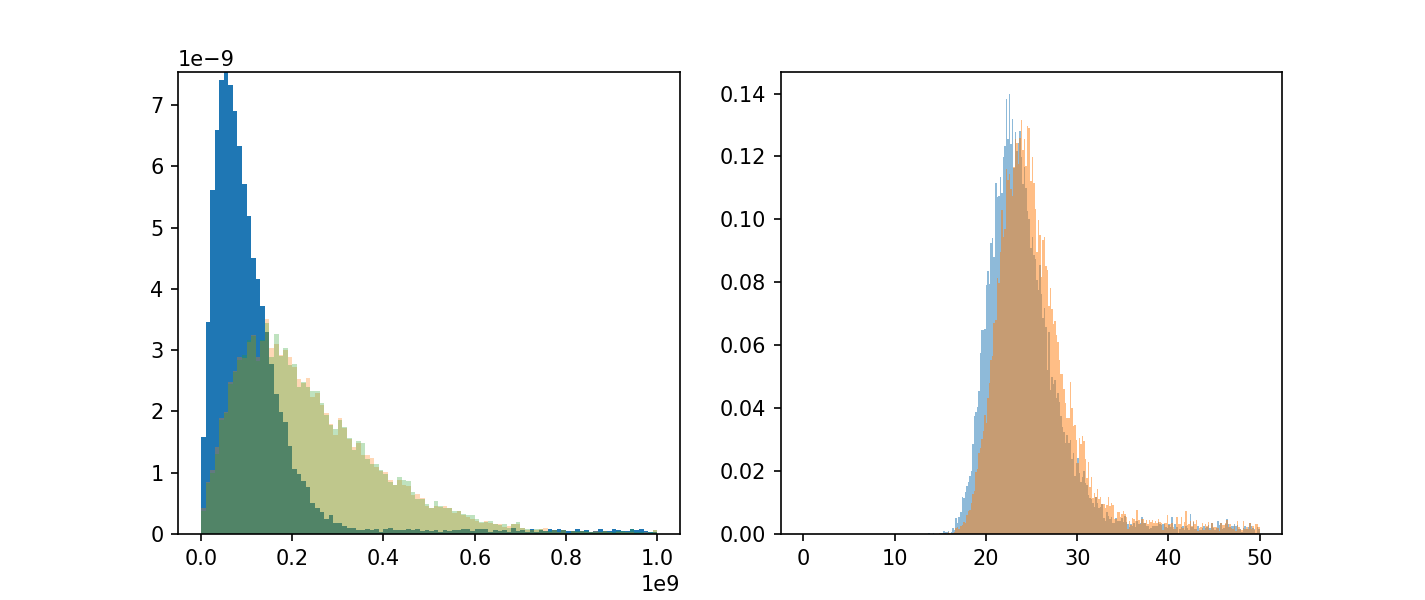

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was de

In [14]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(np.array(np.abs(m_18_z[:,0]))*1e10, normed=True, range=(-0.*1e10,0.1*1e10), bins=100, label=r'signal')
ax[0].hist(np.array(np.abs(m_18_z2[:,0]))*1e10, normed=True, range=(-0.*1e10,0.1*1e10), bins=100, label=r'signal', alpha=0.3)
ax[0].hist(np.array(np.abs(m_18_z3[:,0]))*1e10, normed=True, range=(-0.*1e10,0.1*1e10), bins=100, label=r'signal', alpha=0.3)
# ax[0].hist(np.array(np.abs(m_20_z[:,0]))*1e10, normed=True, range=(-0.*1e10,0.1*1e10), alpha=0.5, bins=100, label=r'noise')
ax[1].hist(m_18_z[:,1],range=(0,50),bins=300,alpha=0.5,normed=True, label=r'signal')
_ = ax[1].hist(m_20_z[:,1],range=(0,50),bins=300,alpha=0.5,normed=True, label=r'nosie')

### Sideband cut

<IPython.core.display.Javascript object>


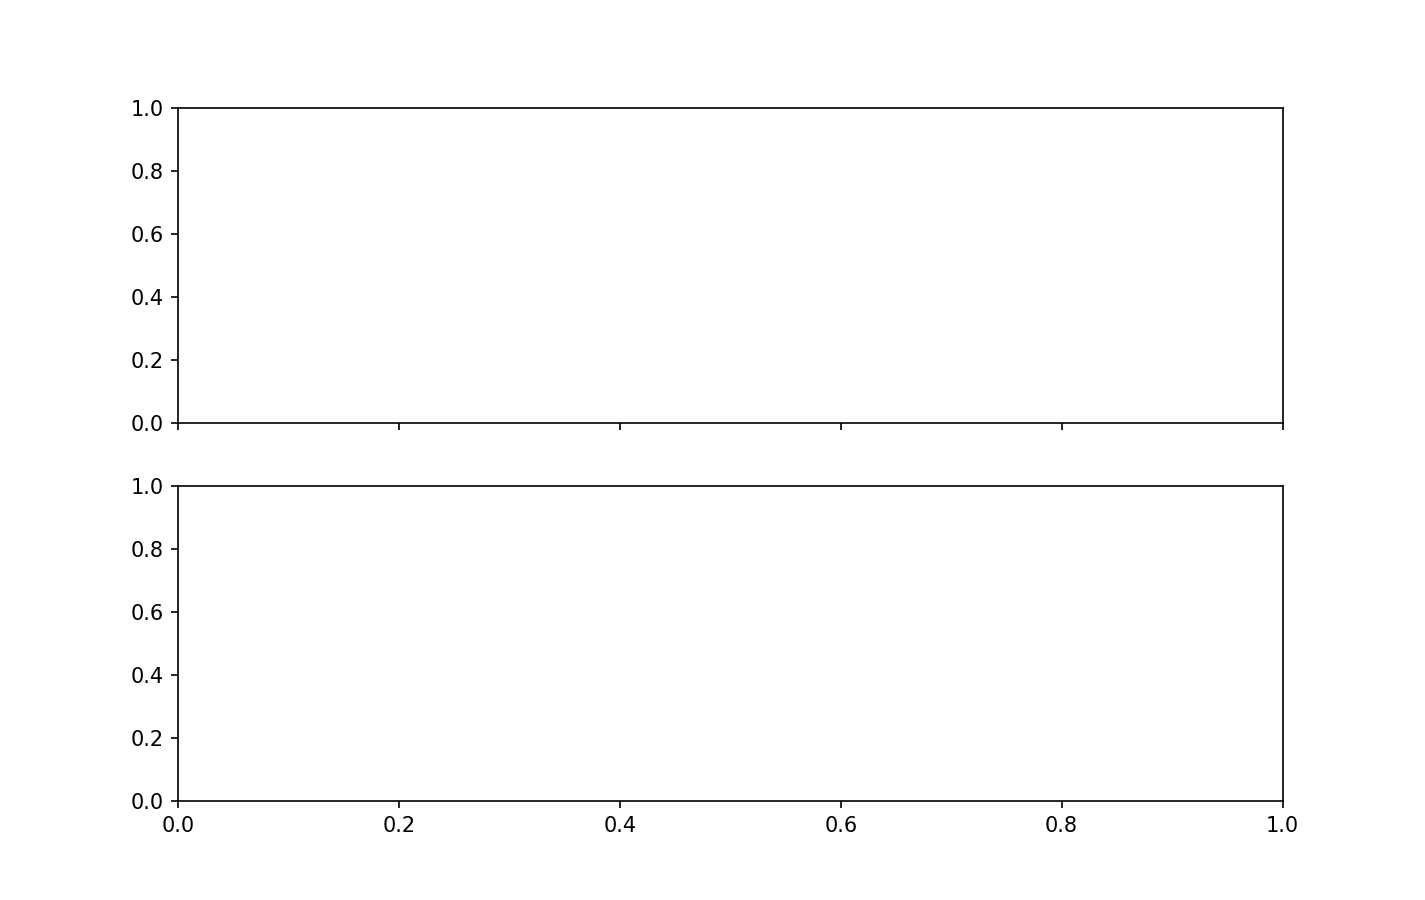

ValueError: x and y must be the same size

In [15]:
_, ax = plt.subplots(2,1,figsize=(9.5,6),sharex=True)
ax[0].scatter(range(Ndata), m_18_z[:,0])
ax[0].set(ylabel=r'$\alpha_z\,[10^{10}]$')
ax[1].scatter(range(Ndata), m_18_z[:,1])
ax[1].set(xlabel='dataset', ylabel=r'$\sigma$', ylim=(0,3000))

<IPython.core.display.Javascript object>


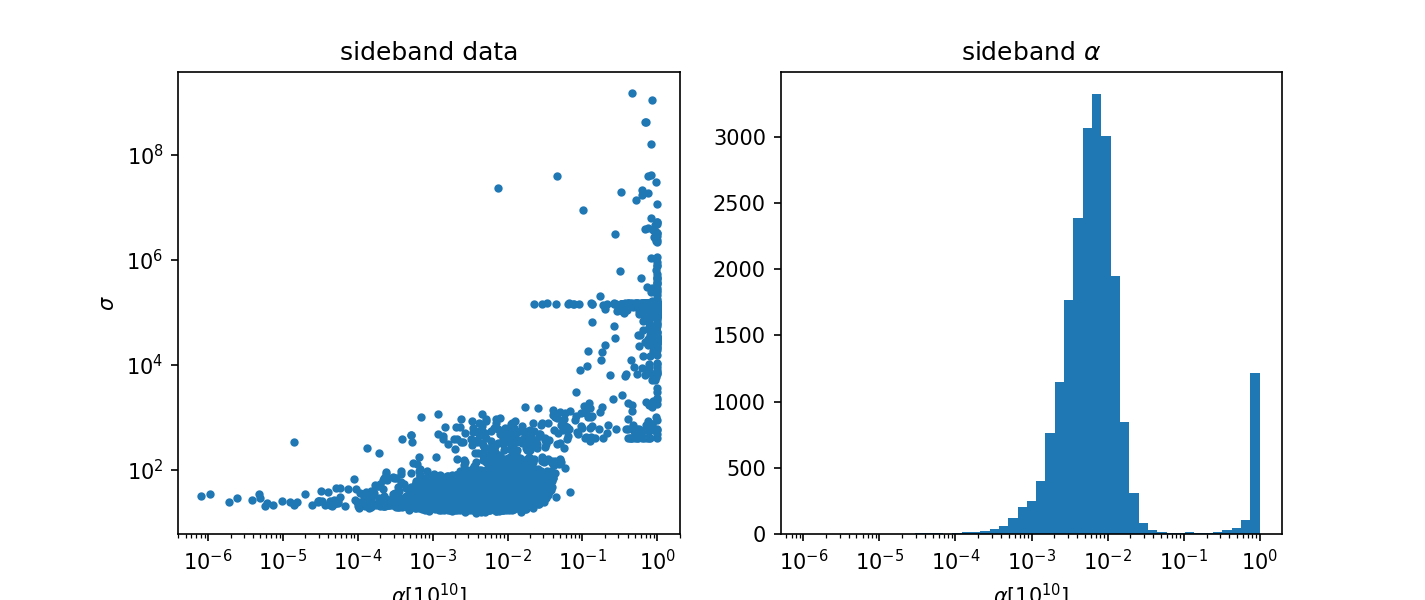

[None,
 Text(0.5, 0, '$\\alpha [10^{10}]$'),
 Text(0.5, 1.0, 'sideband $\\alpha$')]

In [16]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(np.abs(m_20_z[:,0]),m_20_z[:,1],'.')
ax[0].set(xlabel=r'$\alpha [10^{10}]$', ylabel=r'$\sigma$', title='sideband data')
ax[1].hist(np.abs(m_20_z[:,0]),bins=np.logspace(-6,0, 50))
ax[1].set(xscale='log',title=r'sideband $\alpha$', xlabel=r'$\alpha [10^{10}]$')

In [17]:
m_20_filt = np.array([mm20 for mm18,mm20 in zip(m_18_z,m_20_z) if (np.abs(mm18[0])>4e-4)&(np.abs(mm20[0])<0.05)&(np.abs(mm20[0])>4e-4)&(mm20[1]<40)&(mm18[1]<40)])
m_18_filt = np.array([mm18 for mm18,mm20 in zip(m_18_z,m_20_z) if (np.abs(mm18[0])>4e-4)&(np.abs(mm20[0])<0.05)&(np.abs(mm20[0])>4e-4)&(mm20[1]<40)&(mm18[1]<40)])
m_18_x_filt = np.array([mm18_x for mm18_x,mm18,mm20 in zip(m_18_x,m_18_z,m_20_z) if (np.abs(mm18[0])>4e-4)&(np.abs(mm20[0])<0.05)&(np.abs(mm20[0])>4e-4)&(mm20[1]<40)&(mm18[1]<40)])

<IPython.core.display.Javascript object>


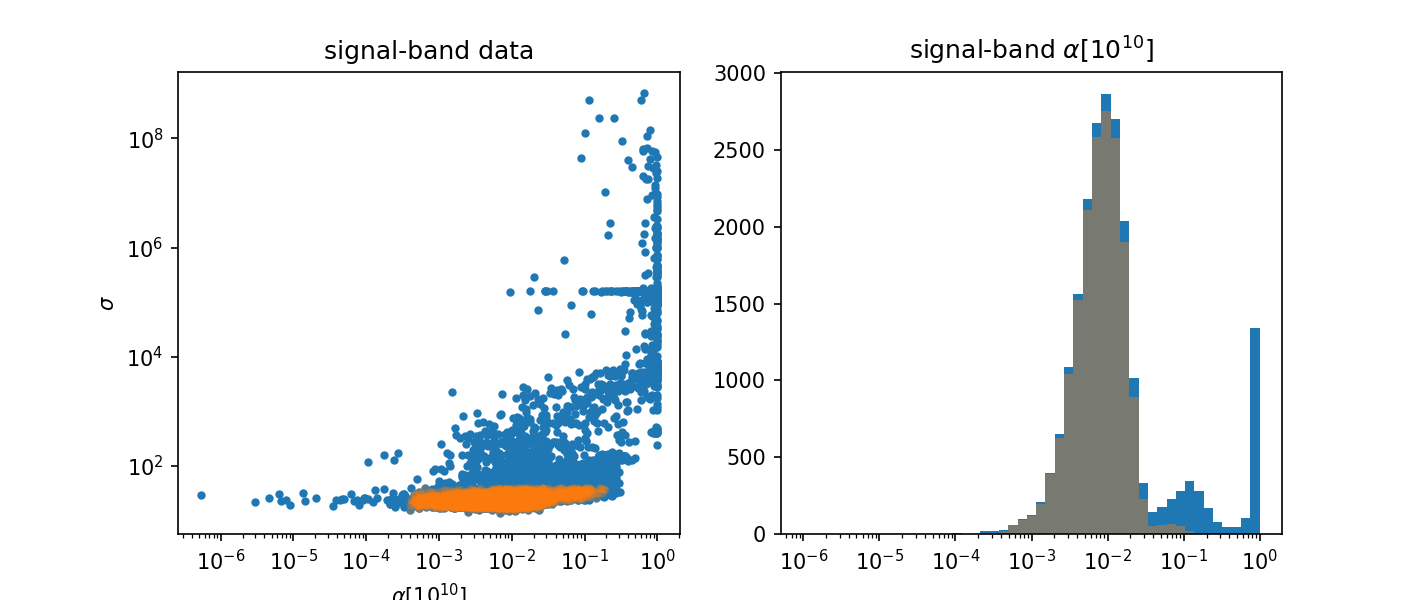

[None, Text(0.5, 1.0, 'signal-band $\\alpha [10^{10}]$')]

In [18]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(np.abs(m_18_z[:,0]),m_18_z[:,1],'.')
ax[0].loglog(np.abs(m_18_filt[:,0]),m_18_filt[:,1],'.', alpha=0.2)
ax[0].set(xlabel=r'$\alpha [10^{10}]$', ylabel=r'$\sigma$', title='signal-band data')
ax[1].hist(np.abs(m_18_z[:,0]),bins=np.logspace(-6,0, 50))
ax[1].hist(np.abs(m_18_filt[:,0]),bins=np.logspace(-6,0, 50), alpha=0.4)
ax[1].set(xscale='log',title=r'signal-band $\alpha [10^{10}]$')

In [161]:
len(m_18_filt)/len(m_18_z)

0.8138073351467967

<IPython.core.display.Javascript object>


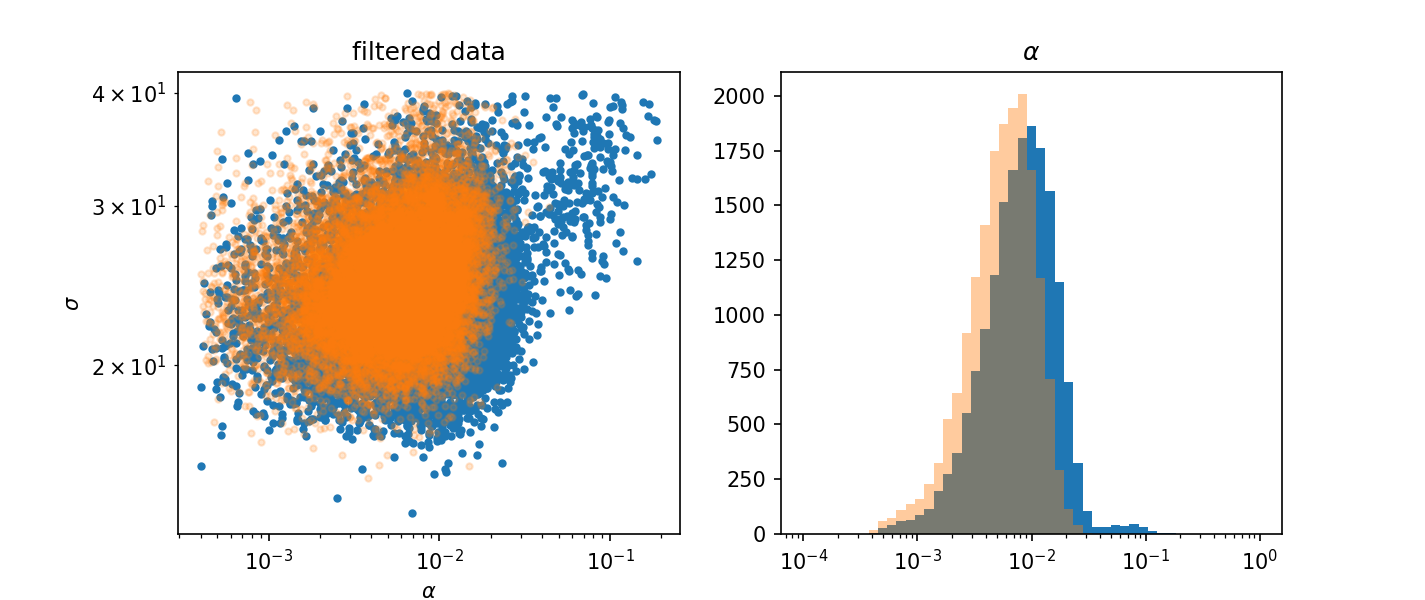

6th hsrmonic mean:  0.010205334862445249  error:  7.718546293979437e-05
noise mean:  0.006562998357025301  error:  3.096387581528183e-05
limit:  3.64e+07


In [29]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(np.abs(m_18_filt[:,0]),m_18_filt[:,1],'.')
ax[0].loglog(np.abs(m_20_filt[:,0]),m_20_filt[:,1],'.', alpha=0.2)
ax[0].set(xlabel=r'$\alpha$', ylabel=r'$\sigma$', title='filtered data')
ax[1].hist(np.abs(m_18_filt[:,0]), range=(0,0.2), bins=np.logspace(-4,0, 50))
ax[1].hist(np.abs(m_20_filt[:,0]), range=(0,0.2), bins=np.logspace(-4,0, 50), alpha=0.4)
ax[1].set(xscale='log',title=r'$\alpha$')
print('6th hsrmonic mean: ',np.mean(np.abs(m_18_filt[:,0])), ' error: ', np.std(np.abs(m_18_filt[:,0]))/np.sqrt(Ndata))
print('noise mean: ',np.mean(np.abs(m_20_filt[:,0])), ' error: ', np.std(np.abs(m_20_filt[:,0]))/np.sqrt(Ndata))
print('limit: ',format((np.mean(np.abs(m_18_filt[:,0]))-np.mean(np.abs(m_20_filt[:,0])))*1e10,"5.2e"))

### Crosstalk cut

<IPython.core.display.Javascript object>


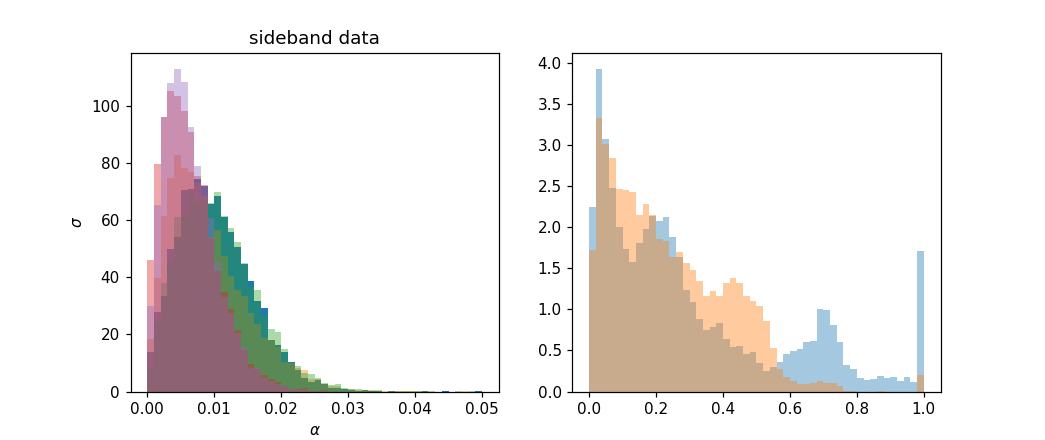

0.010174014779189344
0.010691335643492957
0.009151250350593654
0.08357667487892906 aaa
0.006419855596093783
0.00649674036552548


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
 

In [313]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# ax[0].loglog(np.abs(m_18_z[:N,0]),m_12_z[:N,0],'.')
# ax[0].loglog(np.abs(m_18_z[m_tmp,0]),np.abs(m_12_z[m_tmp,0]),'.')
# ax[0].loglog(np.abs(m_20_z[m_tmp,0]),np.abs(m_10_z[m_tmp,0]),'.', alpha=0.7)
# ax[0].loglog(np.abs(m_18_z[m_tmp,0]),np.abs(m_6_z[m_tmp,0]),'.', alpha=0.2)
ax[0].hist(np.abs(m_12_z[m_tmp,0]), range=(0,0.05), bins=50, normed=True)
ax[0].hist(np.abs(m_18_z[m_tmp,0]), range=(0,0.05), bins=50, normed=True, alpha=0.4)
ax[0].hist(np.abs(m_6_z[m_tmp,0]), range=(0,0.05), bins=50, normed=True, alpha=0.4)
ax[0].hist(np.abs(m_10_z[m_tmp,0]), range=(0,0.05), bins=50, normed=True, alpha=0.4)
ax[0].hist(np.abs(m_20_z[m_tmp,0]), range=(0,0.05), bins=50, normed=True, alpha=0.4)
ax[0].set(xlabel=r'$\alpha$', ylabel=r'$\sigma$', title='sideband data')
# ax[1].hist(np.abs(m_10_z[:,0]),bins=np.logspace(-6,0, 50))
# ax[1].plot(np.abs(m_20_z[:N,1]),m_10_z[:N,1],'.')
# ax[1].plot(np.abs(m_18_z[:N,1]),m_12_z[:N,1],'.')
# ax[1].plot(np.abs(m_18_z[:N,1]),m_12_z[:N,1],'.')

# ax[1].hist(np.abs(m_12_x[:,0]), range=(0,1), bins=50, normed=True)
# ax[1].hist(np.abs(m_12_x[m_tmp,0]), range=(0,1), bins=50, normed=True, alpha=0.4)
# ax[1].hist(np.abs(m_18_x[:,0]), range=(0,1), bins=50, normed=True, alpha=0.4)
# ax[1].hist(np.abs(m_18_x[m_tmp,0]), range=(0,1), bins=50, normed=True, alpha=0.4)
ax[1].hist(np.abs(m_18_x[:,0]), range=(0,1), bins=50, normed=True, alpha=0.4)
ax[1].hist(np.abs(m_6_x[m_tmp,0]), range=(0,1), bins=50, normed=True, alpha=0.4)

# ax[1].plot(np.abs(m_20_z[m_tmp,1]),m_10_z[m_tmp,1],'.')
# ax[1].set(xscale='linear',title=r'sideband $\alpha$', xlim=(0,1000), ylim=(0,1000))
print(np.mean(np.abs(m_12_z[m_tmp,0])))
print(np.mean(np.abs(m_6_z[m_tmp,0])))
print(np.mean(np.abs(m_18_z[m_tmp,0])))
print(np.mean(np.abs(m_18_z[:,0])),'aaa')
print(np.mean(np.abs(m_10_z[m_tmp,0])))
print(np.mean(np.abs(m_20_z[m_tmp,0])))

In [292]:
N = len(m_10_z)
m_tmp = np.array([i for i,mm6,mm12,mm18 in zip(range(18000),m_6_z[:N],m_12_z[:N],m_18_z[:N]) if (mm6[1]<30)&(mm12[1]<30)&(mm18[1]<30)])
# m_tmp[-100:]
len(m_tmp)/N

0.4285317482362091

In [418]:
N = len(m_10_z)
m_tmp4 = np.array([i for i,mm6,mm12,mm18 in zip(range(N),m_6_x[:N],m_12_x[:N],m_18_x[:N]) if (np.abs(mm18[0])>0)&(np.abs(mm18[0])<0.2)])
m_tmp5 = np.array([i for i,mm6,mm12,mm18 in zip(range(N),m_6_x[:N],m_12_x[:N],m_18_x[:N]) if (np.abs(mm18[0])>0.2)&(np.abs(mm18[0])<0.4)])
m_tmp6 = np.array([i for i,mm6,mm12,mm18 in zip(range(N),m_6_x[:N],m_12_x[:N],m_18_x[:N]) if (np.abs(mm18[0])>0.6)&(np.abs(mm18[0])<1)])
m_tmp7 = np.array([i for i,mm6,mm12,mm18 in zip(range(N),m_6_x[:N],m_12_x[:N],m_18_x[:N]) if (np.abs(mm18[0])>1)])
len(m_tmp7)/N, len(m_tmp6)/N

(0.030442753180378868, 0.15221376590189434)

<IPython.core.display.Javascript object>


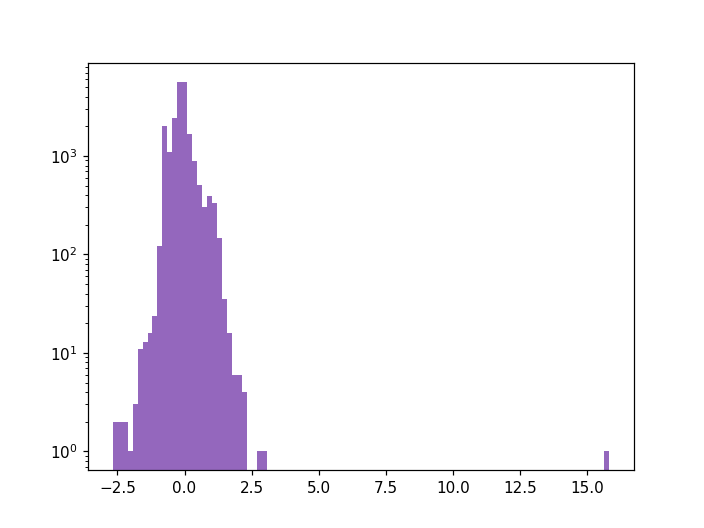

(array([2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.100e+01,
        1.300e+01, 1.600e+01, 2.400e+01, 1.230e+02, 2.005e+03, 1.108e+03,
        2.455e+03, 5.660e+03, 5.593e+03, 1.653e+03, 8.900e+02, 5.060e+02,
        3.060e+02, 3.960e+02, 3.360e+02, 1.470e+02, 3.500e+01, 1.600e+01,
        6.000e+00, 6.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [428]:
_, ax = plt.subplots()
ax.hist(np.abs(m_18_z[m_tmp4,0]), range=(0,0.5), bins=50, alpha=1)
ax.hist(np.abs(m_18_z[m_tmp5,0]), range=(0,0.5), bins=50, alpha=0.5)
ax.hist(np.abs(m_18_z[m_tmp6,0]), range=(0,0.5), bins=50, alpha=0.3)
ax.hist(np.abs(m_18_z[m_tmp7,0]), range=(0,0.5), bins=50, alpha=0.2)
ax.set(yscale='log')
# ax.scatter(m_18_x[m_tmp7,0],m_18_z[m_tmp7,0])
ax.hist(m_18_x[:,0],bins=100)
# ax.set(xscale='log')

<IPython.core.display.Javascript object>


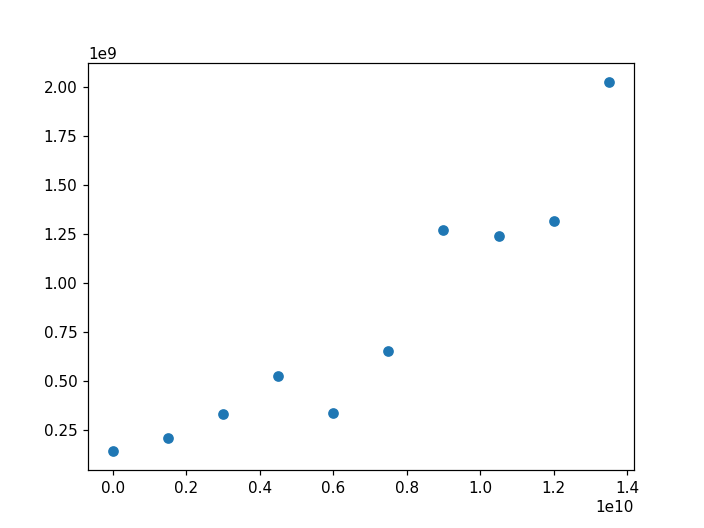

In [437]:
m_val = [np.mean(np.array([np.abs(z[0]) for z,mm18 in zip(m_18_z[:N],m_18_x[:N]) if (np.abs(mm18[0])>0.15*i)&(np.abs(mm18[0])<0.15*(i+1))])) for i in range(10)]
_,ax = plt.subplots()
ax.scatter(np.arange(10)*0.15*1e10, np.array(m_val)*1e10)

In [ ]:
# Normal feedback values
fnames = [r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/Shaking3_{}.h5'.format(i) for i in range(8000,9000)]
data_bdfs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]
len(m_tmp3)

In [7]:
# bdf_discharge = load_dir(dirname='/data/new_trap/20200226/Bead1/Discharge/')
# bdf_z = bdf_discharge[44:48]
# bdf_x = bdf_discharge[48:53]
# bdf_y = bdf_discharge[53:58]

freq = bdf_z[0].psd2('z')[0]
z_scale = np.sqrt(bdf_z[0].psd2('z')[1][freq==71])
# for bb in bdf_z:
#     z_scale += np.sqrt(bb.psd2('z')[1][freq==71])
# z_scale /= len(bdf_z)

freq = bdf_x[0].psd2('x')[0]
x_scale = np.sqrt(bdf_x[0].psd2('x')[1][freq==71])
# for bb in bdf_x:
#     x_scale += np.sqrt(bb.psd2('x')[1][freq==71])
# x_scale /= len(bdf_x)

freq = bdf_y[0].psd2('y')[0]
y_scale = np.sqrt(bdf_y[0].psd2('y')[1][freq==71])
# for bb in bdf_y:
#     y_scale += np.sqrt(bb.psd2('y')[1][freq==71])
# y_scale /= len(bdf_y)

force = 13 * 1.6e-19 * 20 / 8e-3 * 0.63 * np.sqrt(10)  # in Newtons
z_scale = force/z_scale
x_scale = force/x_scale
y_scale = force/y_scale

# m1s_z = np.mean([np.std(bb.response_at_freq2(drive_freq=71))*np.sqrt(2) for bb in bdf_z])
# m1s_x = gfw.build_x_response(bdf_x, drive_freq=71,charges=13, bandwidth=2, decimate=100)

No height data
No electrodes data
No cantilever data
No laser power data
No height data
No electrodes data
No cantilever data
No laser power data


<IPython.core.display.Javascript object>


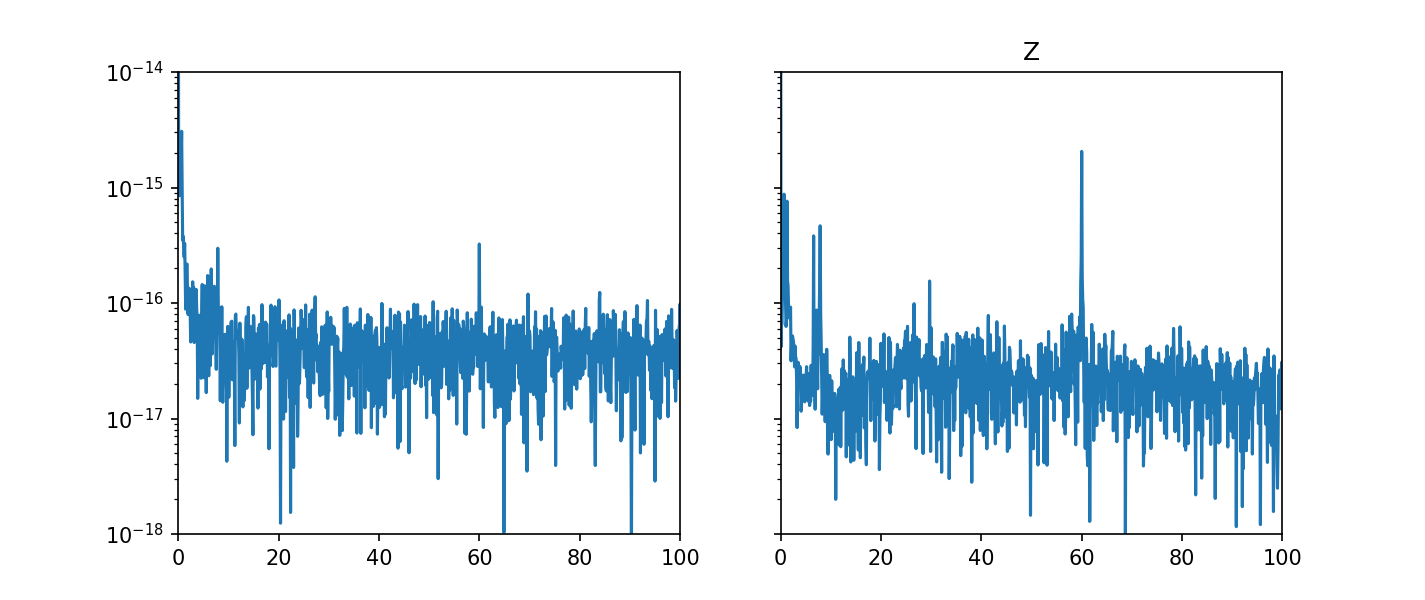

[(1e-18, 1e-14), (0, 100), Text(0.5, 1.0, 'Z')]

In [9]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200226/Bead1/InitialTest/Data81.h5')
bb1 = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200226/Bead1/InitialTest/Data92.h5')
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
freq, fftx = bb.psd2('x')
freq, fftx1 = bb1.psd2('x')
ax[0].semilogy(freq,np.sqrt(fftx)*x_scale)
# ax[0].semilogy(freq,np.sqrt(fftx1)*x_scale)
# ax[0].set(xlim=(0,1000), ylabel=r'Force [N]', title='X')
freq, fftz = bb.psd2('z')
freq, fftz1 = bb1.psd2('z')
ax[1].semilogy(freq,np.sqrt(fftz)*z_scale)
# ax[1].semilogy(freq,np.sqrt(fftz1)*z_scale)
ax[1].set(xlim=(0,100), title='Z', ylim=(1e-18, 1e-14))

<IPython.core.display.Javascript object>


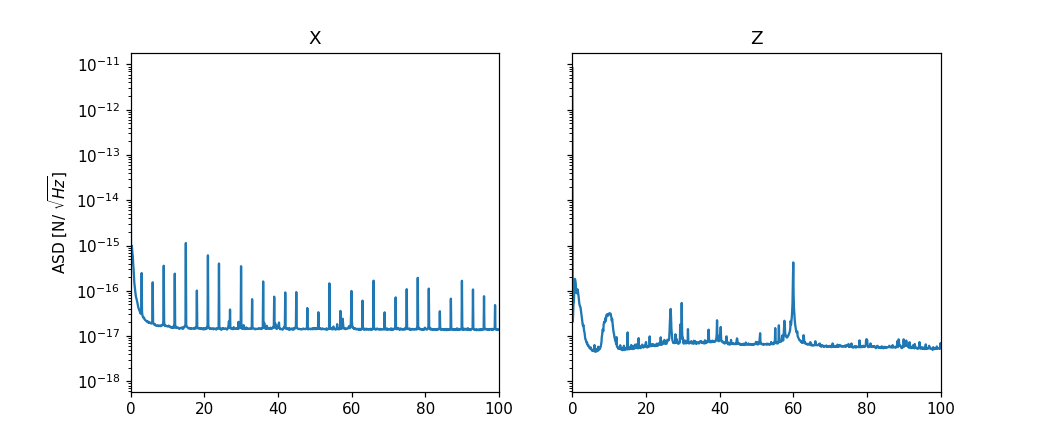

[(0, 100), Text(0.5, 1.0, 'Z')]

In [563]:
# bb = data_bdfs[100]
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
# freq, fftx = data_bdfs[0].psd2('y')
# fftz = data_bdfs[0].psd2('z')[1]
# ffty = data_bdfs[0].psd2('y')[1]
# for i in range(1,1000):
#     fftx += data_bdfs[i].psd2('x')[1]
#     fftz += data_bdfs[i].psd2('z')[1]
#     ffty += data_bdfs[i].psd2('y')[1]

# [ax[0].semilogy(*bb.psd2('x')) for bb in data_bdfs[:10]]
ax[0].semilogy(freq,np.sqrt(fftx/1000)*x_scale)
ax[0].set(xlim=(0,100), ylabel=r'ASD [N/ $\sqrt{Hz}$]', title='X')
# ax[1].semilogy(freq,np.sqrt(ffty/1000)*y_scale)
# ax[1].set(xlim=(0,100))
ax[1].semilogy(freq,np.sqrt(fftz/1000)*z_scale)
ax[1].set(xlim=(0,100), title='Z')

<IPython.core.display.Javascript object>


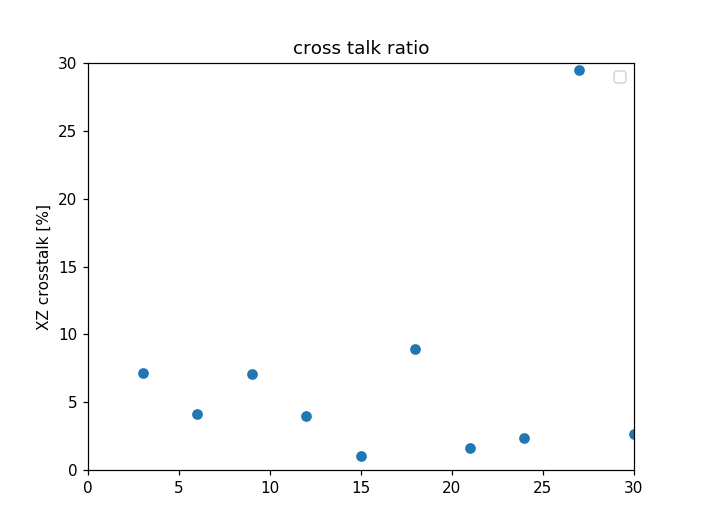

No handles with labels found to put in legend.


In [525]:
_,ax = plt.subplots()
fff = []
ratio = []
for ff,tx,tz in zip(freq,np.sqrt(fftx/1000)*x_scale,np.sqrt(fftz/1000)*z_scale):
    if (ff%3==0)&(ff<100)&(ff>0):
        fff.append(ff)
        ratio.append(tz/tx*100)
ax.scatter(fff,ratio)

# fff = []
# ratio = []
# for ff,tx,ty in zip(freq,np.sqrt(fftx/1000)*x_scale,np.sqrt(ffty/1000)*y_scale):
#     if (ff%3==0)&(ff<100)&(ff>0):
#         fff.append(ff)
#         ratio.append(ty/tx*100)
# ax.scatter(fff,ratio, label='XY crosstalk')

ax.set(xlim=(0,30), ylim=(0,30), title='cross talk ratio', ylabel='XZ crosstalk [%]')
ax.legend()

### X-axis cut

<IPython.core.display.Javascript object>


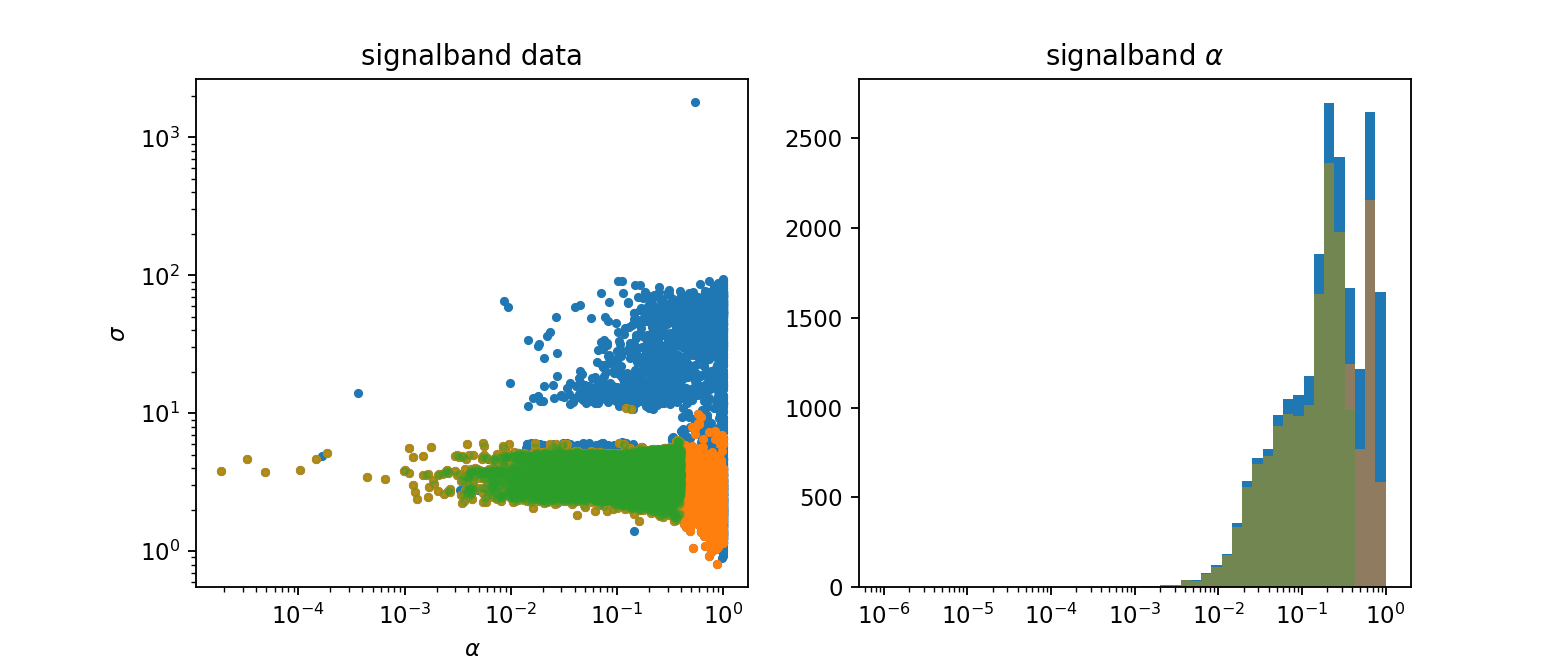

[None, Text(0.5, 1.0, 'signalband $\\alpha$')]

In [194]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(np.abs(m_18_x[:,0]),m_18_x[:,1],'.')
ax[0].loglog(np.abs(m_18_x_filt[:,0]),m_18_x_filt[:,1],'.')
ax[0].loglog(np.abs(m_18_x_filt2[:,0]),m_18_x_filt2[:,1],'.', alpha=0.3)
ax[0].set(xlabel=r'$\alpha$', ylabel=r'$\sigma$', title='signalband data')
ax[1].hist(np.abs(m_18_x[:,0]),bins=np.logspace(-6,0, 50))
ax[1].hist(np.abs(m_18_x_filt[:,0]),bins=np.logspace(-6,0, 50), alpha=0.5)
ax[1].hist(np.abs(m_18_x_filt2[:,0]),bins=np.logspace(-6,0, 50), alpha=0.3)
ax[1].set(xscale='log',title=r'signalband $\alpha$')

In [198]:
len(m_18_filt2)/len(m_18_x)

0.6252696745145859

<IPython.core.display.Javascript object>


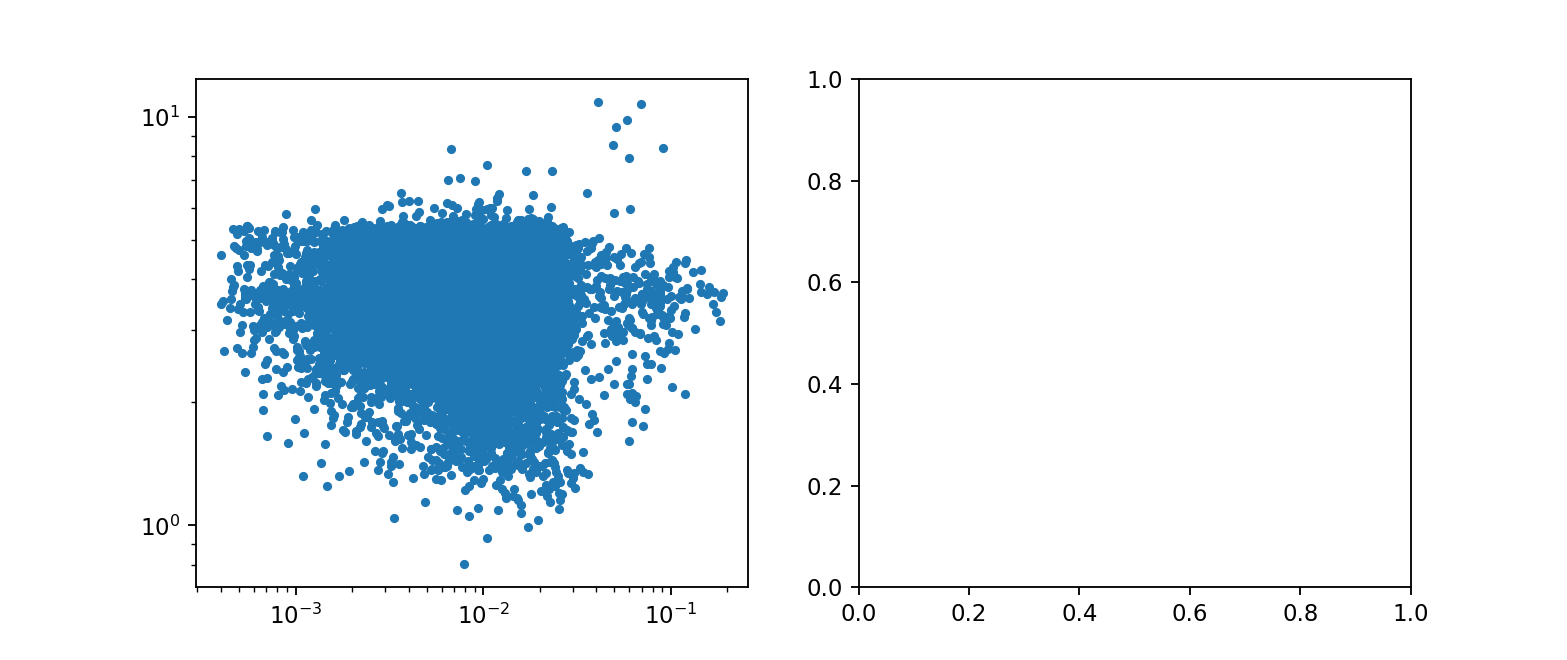

In [204]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(np.abs(m_18_filt[:,0]),np.abs(m_18_x_filt[:,1]),'.')
# ax[0].loglog(np.abs(m_20_filt2[:,0]),m_20_filt2[:,1],'.', alpha=0.2)
# ax[0].set(xlabel=r'$\alpha$', ylabel=r'$\sigma$', title='sideband data')
# ax[1].hist(np.abs(m_18_filt2[:,0]), range=(0,0.2), bins=200)
# ax[1].hist(np.abs(m_20_filt2[:,0]), range=(0,0.2), bins=200, alpha=0.4)
# ax[1].set(xscale='linear',title=r'sideband $\alpha$')
# print('6th hsrmonic mean: ',np.mean(np.abs(m_18_filt2[:,0])), ' error: ', np.std(np.abs(m_18_filt2[:,0]))/np.sqrt(Ndata))
# print('noise mean: ',np.mean(np.abs(m_20_filt2[:,0])), ' error: ', np.std(np.abs(m_20_filt2[:,0]))/np.sqrt(Ndata))

In [197]:
m_18_x_filt2 = np.array([mmx for mmx,mm18,mm20 in zip(m_18_x_filt,m_18_filt,m_20_filt) if (np.abs(mmx[0])>1e-2)&(np.abs(mmx[0])<0.4)])
m_18_filt2 = np.array([mm18 for mmx,mm18,mm20 in zip(m_18_x_filt,m_18_filt,m_20_filt) if (np.abs(mmx[0])>1e-2)&(np.abs(mmx[0])<0.4)])
m_20_filt2 = np.array([mm20 for mmx,mm18,mm20 in zip(m_18_x_filt,m_18_filt,m_20_filt) if (np.abs(mmx[0])>1e-2)&(np.abs(mmx[0])<0.4)])